# CNN for Image Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

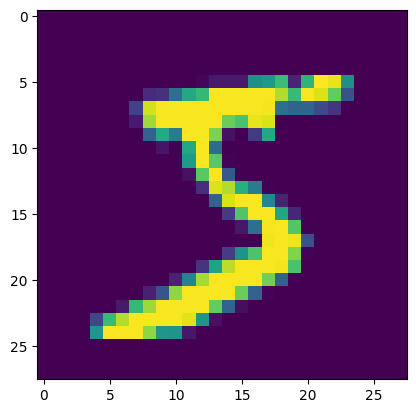

In [8]:
plt.imshow(single_image) #cmap = 'gray'

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

1.0

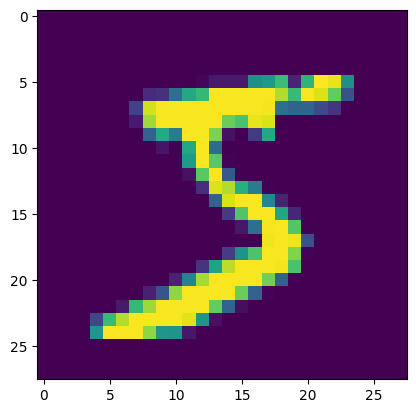

In [24]:
plt.imshow(scaled_single)

## Reshaping the Data

We need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [43]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0689 - val_accuracy: 0.9867
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0582 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0609 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0550 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0615 - val_accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0654 - val_accuracy: 0.9874


## Evaluate the Model

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
losses = pd.DataFrame(model.history.history)

In [46]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.003545,0.998717,0.068853,0.9867
1,0.005385,0.998350,0.058162,0.9860
2,0.002917,0.999100,0.060943,0.9868
3,0.003641,0.998783,0.054954,0.9885
4,0.002445,0.999250,0.061476,0.9877


<Axes: >

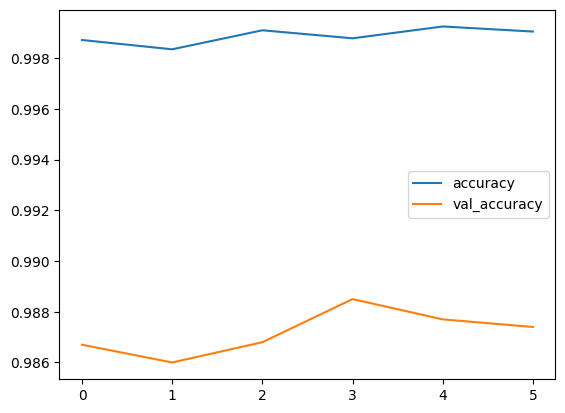

In [47]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

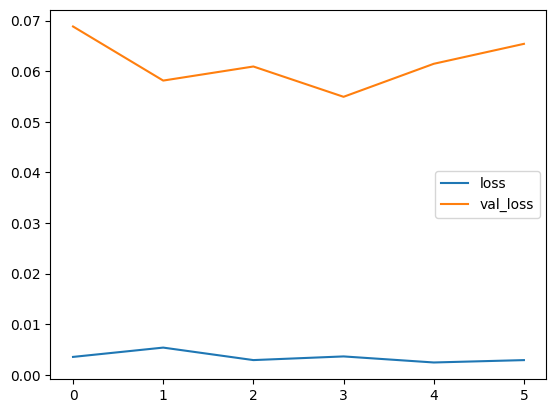

In [49]:
losses[['loss','val_loss']].plot()

In [50]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.06541944295167923, 0.9873999953269958]


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
y_prob = model.predict(x_test)
predictions = y_prob.argmax(axis=-1)

313/313 [==============================] - 3s 9ms/step


In [57]:
y_cat_test.shape

(10000, 10)

In [58]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [59]:
predictions[0]

7

In [60]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [62]:
confusion_matrix(y_test,predictions)

array([[ 976,    0,    0,    1,    0,    1,    2,    0,    0,    0],
       [   0, 1131,    1,    0,    0,    0,    2,    1,    0,    0],
       [   2,    2, 1013,    1,    1,    0,    2,    4,    7,    0],
       [   0,    0,    0,  999,    0,    7,    0,    1,    3,    0],
       [   0,    0,    0,    0,  973,    0,    5,    0,    0,    4],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   2,    2,    0,    0,    1,    1,  951,    0,    1,    0],
       [   1,    1,    5,    0,    3,    1,    0, 1012,    3,    2],
       [   2,    2,    0,    2,    1,    2,    1,    1,  960,    3],
       [   0,    1,    0,    2,   22,    7,    1,    2,    2,  972]])

In [63]:
import seaborn as sns

<Axes: >

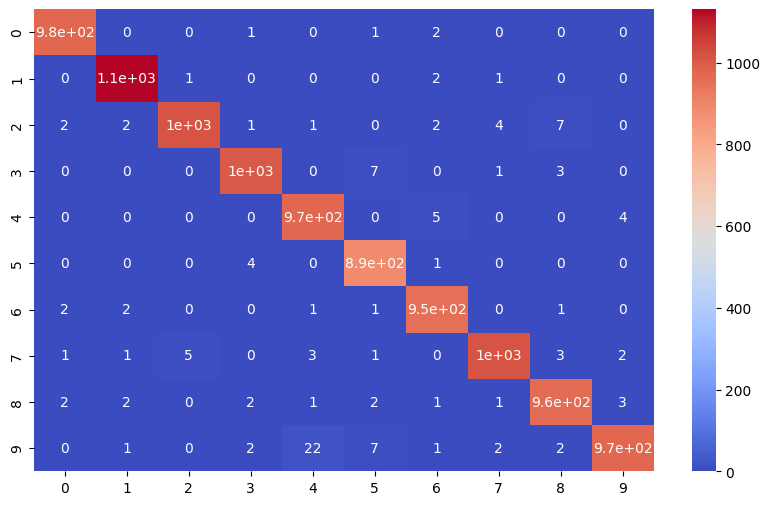

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap = 'coolwarm')

# Predicting a given image

In [68]:
my_number = x_test[0]

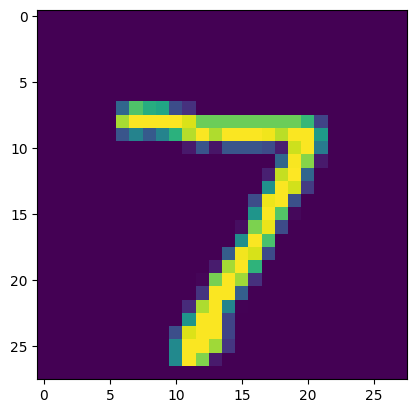

In [69]:
plt.imshow(my_number.reshape(28,28))

In [71]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 41ms/step


array([[5.9230908e-22, 6.5604522e-19, 9.1002542e-21, 9.7975708e-16,
        2.1128709e-21, 7.3784314e-24, 4.9591450e-32, 1.0000000e+00,
        1.5427190e-18, 6.4087545e-17]], dtype=float32)

In [74]:
image_prob = model.predict(my_number.reshape(1,28,28,1))
image_prob.argmax(axis=-1)

1/1 [==============================] - 0s 25ms/step


array([7])